In [33]:
#data manipulation
import pandas as pd

#numerical operations
import numpy as np

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Machine Learning tools
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [34]:
# 1. Data Loading

# Load your CSV file using Pandas.

# 2. Data Inspection

# View basic info: column names, shape, and sample data.

# 3. Data Cleaning

# Check for missing values (NaN).

# Handle them (remove, fill with averages/medians, etc.).

# 4. Exploratory Data Analysis (EDA)

# Describe statistics: mean, min, max, std for each column.

# Visualize trends: plot temperature/rainfall changes over time.

# 5. Feature Engineering

# Convert "time" to datetime and extract new features (year, month, season).

# Create any useful derived features.

# 6. Model Selection / Problem Definition

# Decide your ML goal (e.g., regression for rainfall prediction, time-series forecasting, or anomaly detection).

# 7. Data Preprocessing

# Normalize/scale features if needed.

# Split data into train/test sets.

# 8. Model Training

# Choose a simple model (e.g., Linear Regression for regression; ARIMA/RNN for time series).

# Fit model to training data.

# 9. Model Evaluation

# Evaluate performance on test data.

# Use metrics like RMSE, MAE for regression.

# 10. Model Deployment/Usage

# Use your trained model to make predictions on new or unseen data.



In [35]:
# Load dataset
df = pd.read_csv("D:\\Rainfall Predication model\\Bangalore_1990_2022_BangaloreCity.csv")

In [36]:
df.head()#top_row5

,time,tavg,tmin,tmax,prcp
0,01/01/1990,22.9,19.1,28.4,NaN
1,02/01/1990,21.7,NaN,26.5,0.0
2,03/01/1990,21.0,16.4,26.5,0.0
3,04/01/1990,20.8,NaN,27.4,0.0
4,05/01/1990,20.4,14.2,26.1,0.0


In [37]:
#inspect Data
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11894 entries, 0 to 11893
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    11894 non-null  object 
 1   tavg    11824 non-null  float64
 2   tmin    10505 non-null  float64
 3   tmax    11265 non-null  float64
 4   prcp    7274 non-null   float64
dtypes: float64(4), object(1)
memory usage: 464.7+ KB


,tavg,tmin,tmax,prcp
count,11824.000000,10505.000000,11265.000000,7274.000000
mean,23.840426,19.385131,29.932827,4.414119
std,2.309899,2.367239,2.957866,12.994655
min,17.200000,9.300000,19.800000,0.000000
25%,22.300000,18.100000,27.900000,0.000000
50%,23.500000,19.800000,29.500000,0.000000
75%,25.200000,20.800000,32.000000,2.000000
max,32.400000,27.900000,39.200000,271.300000


In [38]:
# Check for missing values
df.isnull().sum()

time       0
tavg      70
tmin    1389
tmax     629
prcp    4620
dtype: int64

In [39]:
# Convert dates to datetime
df['time'] = pd.to_datetime(df['time'], format='%d/%m/%Y')

# Handle missing values with median
# Modified for pandas 3.0 compatibility
df.fillna({
    'tavg': df['tavg'].median(),
    'tmin': df['tmin'].median(),
    'tmax': df['tmax'].median(),
    'prcp': 0
}, inplace=True)


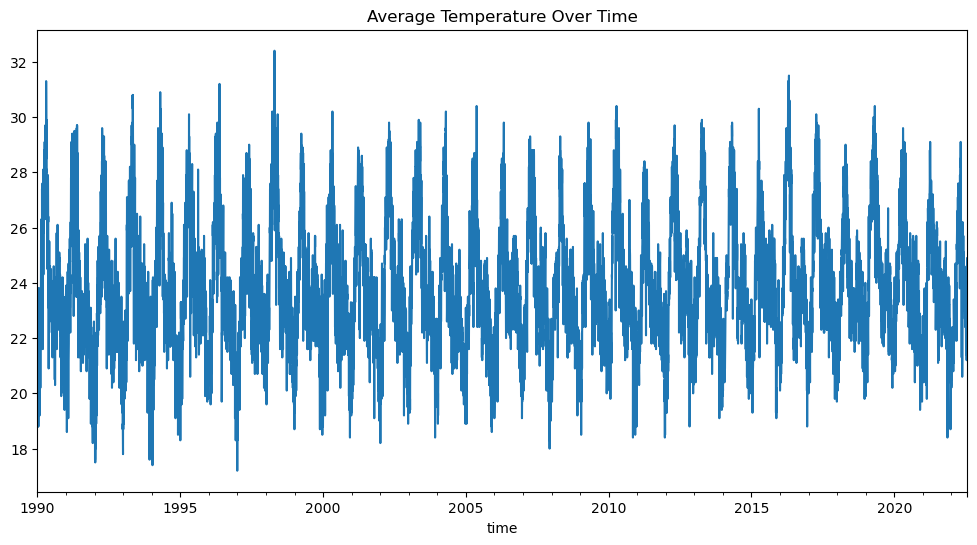

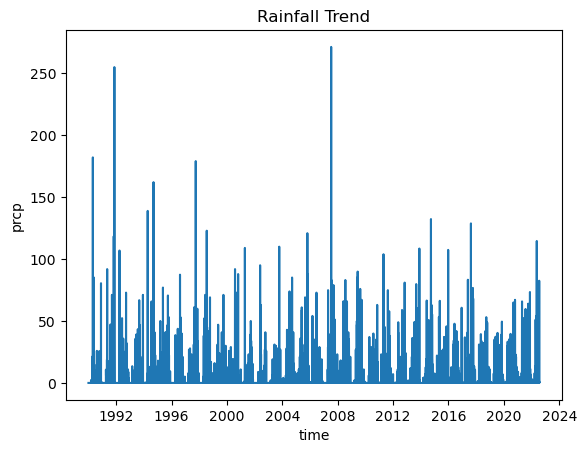

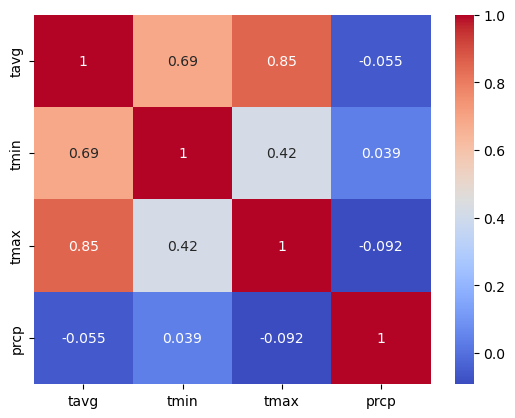

In [40]:
# Plot average temperature trend
df.set_index('time')['tavg'].plot(figsize=(12,6), title='Average Temperature Over Time')
plt.show()

# Rainfall trend
sns.lineplot(x='time', y='prcp', data=df)
plt.title('Rainfall Trend')
plt.show()

# Correlation heatmap
sns.heatmap(df[['tavg','tmin','tmax','prcp']].corr(), annot=True, cmap='coolwarm')
plt.show()


In [41]:
# Create new date-based features
df['year'] = df['time'].dt.year
df['month'] = df['time'].dt.month
df['day'] = df['time'].dt.day

df.head()

,time,tavg,tmin,tmax,prcp,year,month,day
0,1990-01-01,22.9,19.1,28.4,0.0,1990,1,1
1,1990-01-02,21.7,19.8,26.5,0.0,1990,1,2
2,1990-01-03,21.0,16.4,26.5,0.0,1990,1,3
3,1990-01-04,20.8,19.8,27.4,0.0,1990,1,4
4,1990-01-05,20.4,14.2,26.1,0.0,1990,1,5


In [42]:
# Define features (X) and target (y)
X = df[['tmin', 'tmax', 'prcp', 'month']]
y = df['tavg']


In [43]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
# Initialize and train linear regression model
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

In [45]:
results = {}

In [46]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results[name] = {'R2 Score': r2, 'RMSE': rmse}

In [47]:
# Display results
for model_name, metrics in results.items():
    print(f'{model_name}: R2 Score={metrics["R2 Score"]:.4f}, RMSE={metrics["RMSE"]:.4f}')

Linear Regression: R2 Score=0.8654, RMSE=0.8631
Ridge Regression: R2 Score=0.8654, RMSE=0.8631
Lasso Regression: R2 Score=0.8208, RMSE=0.9959
Random Forest: R2 Score=0.8795, RMSE=0.8166
Gradient Boosting: R2 Score=0.8944, RMSE=0.7644


In [48]:
# Predict on test data
y_pred = model.predict(X_test)

# Evaluate
print('R2 Score:', r2_score(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))


R2 Score: 0.8944093193040217
RMSE: 0.7644437739617213


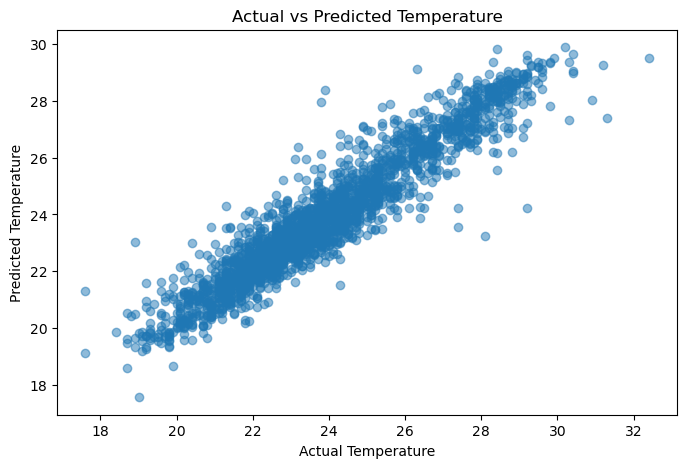

In [50]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')
plt.title('Actual vs Predicted Temperature')
plt.show()

In [51]:
# Example: Use best model for final prediction & visualization
best_model = GradientBoostingRegressor()
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

In [ ]:
import joblib
joblib.dump(best_model, 'bangalore_temp_model.pkl')
